In [ ]:
!unzip clipped_dataset.zip

In [ ]:
!pip install rasterio

# MODIS LAND COVER

In [ ]:
import xml.etree.ElementTree as ET
import glob
import os

# Directory containing the XML files
data_dir = "/content/Datasets_Hackathon/Modis_Land_Cover_Data"  # Change this to your directory

# Find all XML files in the directory
xml_data = sorted(glob.glob(os.path.join(data_dir, "*.aux.xml")))

# Check if files are found
if not xml_data:
    print("No XML files found in the specified directory.")

# Set to store unique values
unique_values = set()

# Loop through each XML file and process it
for data in xml_data:
    print(f"Processing file: {data}")

    # Parse the XML file
    tree = ET.parse(data)
    root = tree.getroot()

    # Extract statistics from Metadata
    for mdi in root.findall(".//Metadata//MDI"):
        key = mdi.attrib.get('key')
        value = mdi.text
        # Add unique values to the set
        if key in ["STATISTICS_MINIMUM", "STATISTICS_MAXIMUM", "STATISTICS_MEAN", "STATISTICS_STDDEV", "STATISTICS_COUNT"]:
            unique_values.add(value)

    # Extract HistCounts data (if required)
    for hist_item in root.findall(".//Histograms//HistItem"):
        hist_counts = hist_item.find("HistCounts").text
        unique_values.add(hist_counts)

# Print unique values found
print(f"Unique values found: {unique_values}")


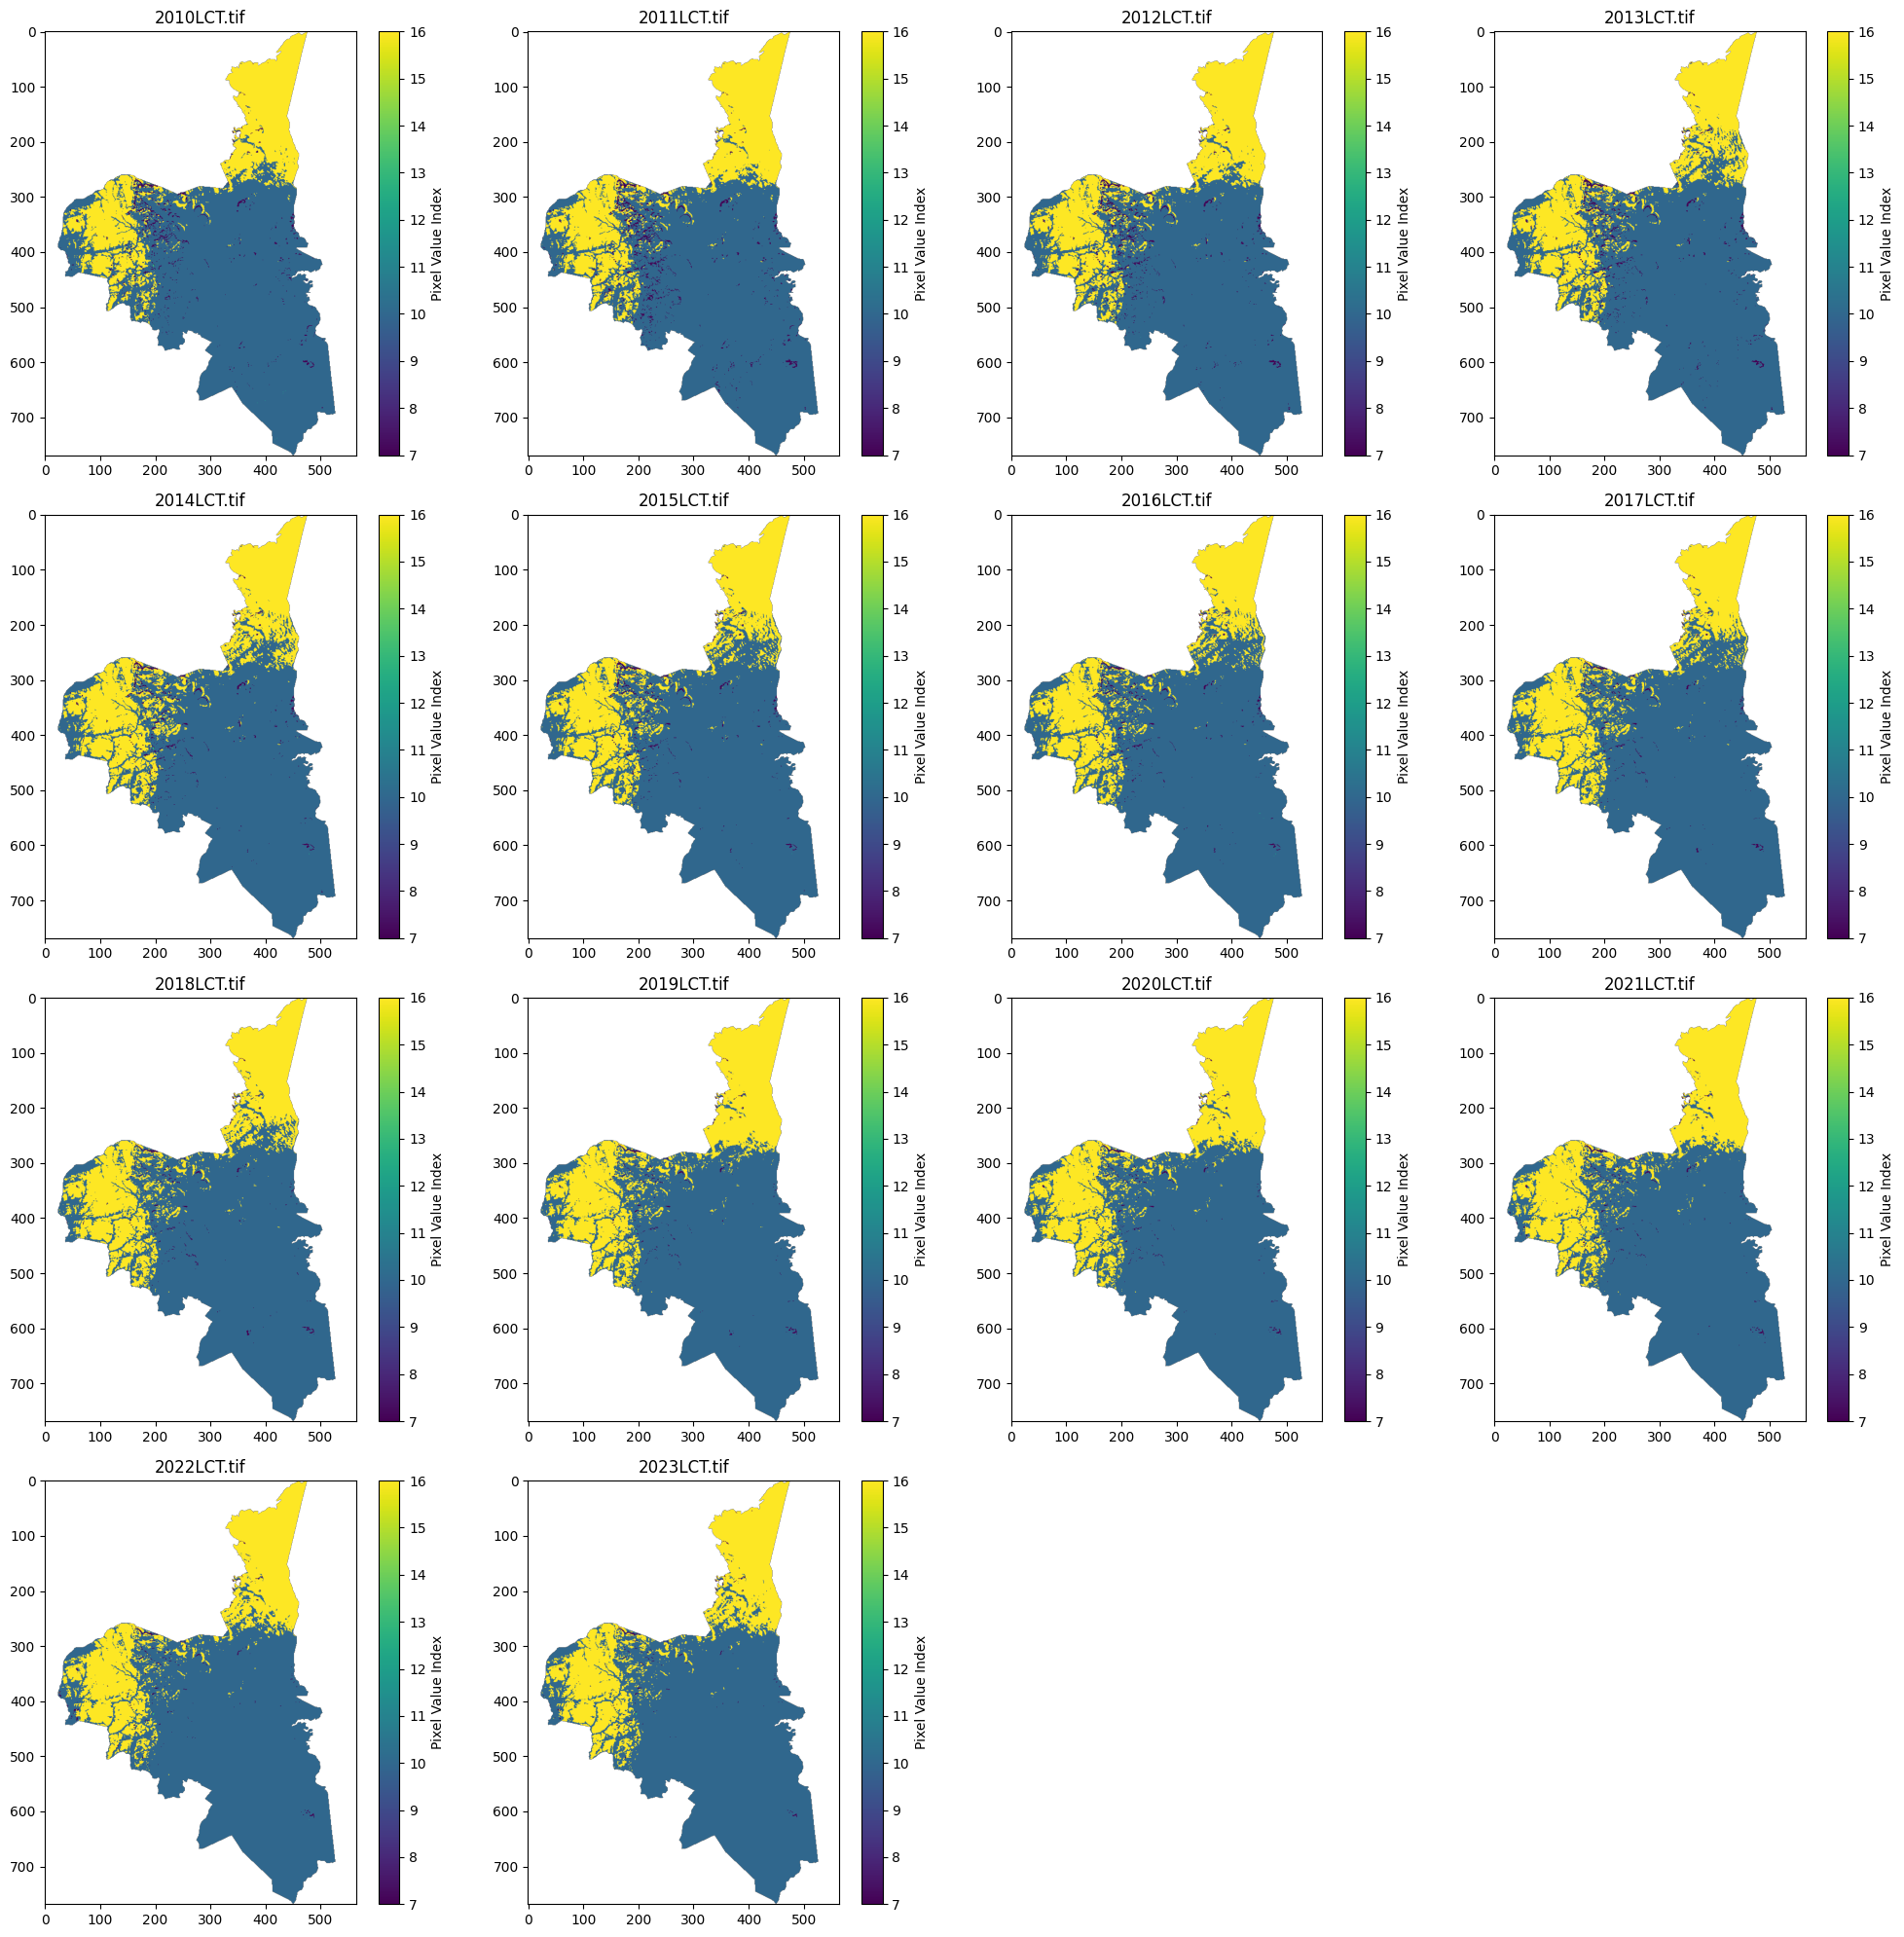

In [42]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import math

# Directory containing the TIFF files (modify as needed)
data_dir = "/content/Datasets_Hackathon/Modis_Land_Cover_Data"  # Change this to your directory

# Find all TIFF files in the directory
tif_files = sorted(glob.glob(os.path.join(data_dir, "*.tif")))

# Check if files are found
if not tif_files:
    print("No TIFF files found in the specified directory.")

# Determine the number of rows and columns for the subplot grid
num_files = len(tif_files)
rows = math.ceil(math.sqrt(num_files))  # Round up to get the number of rows
cols = math.ceil(num_files / rows)  # Compute number of columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()  # Flatten in case of a 2D array

# Loop through each file and plot the data
for ax, tif_file in zip(axes, tif_files):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read first band

        # Mask out out of boundary (assuming values are -3.4028235e+38 for out of bounds)
        mask_out_of_bound = (data == -128) | (data == 255)


        # You can add any other specific condition for 'yellow' or high values if needed
        # Here we use a threshold as an example for high values (change as necessary)
        # mask_yellow = data > 65532  # Example threshold for yellow (modify as needed)

        # Mask out out-of-bound and yellow values
        data = np.where(mask_out_of_bound, np.nan, data)  # Replace out of boundary values with NaN
        # data = np.where(mask_yellow, np.nan, data)  # Replace yellow values with NaN (transparent)

        # Optionally, mask border values (set to 0 as black) - if you have a specific condition for borders
        mask_border = data == 0  # Example condition for border (change as needed)
        data = np.where(mask_border, 0, data)  # Set border values to 0 (black)

        # Show image
        img = ax.imshow(data, cmap='viridis')
        ax.set_title(os.path.basename(tif_file))

        # Add colorbar
        cbar = plt.colorbar(img, ax=ax, orientation='vertical')
        cbar.set_label("Pixel Value Index")

# Hide any unused subplots
for i in range(num_files, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


MODIS GP

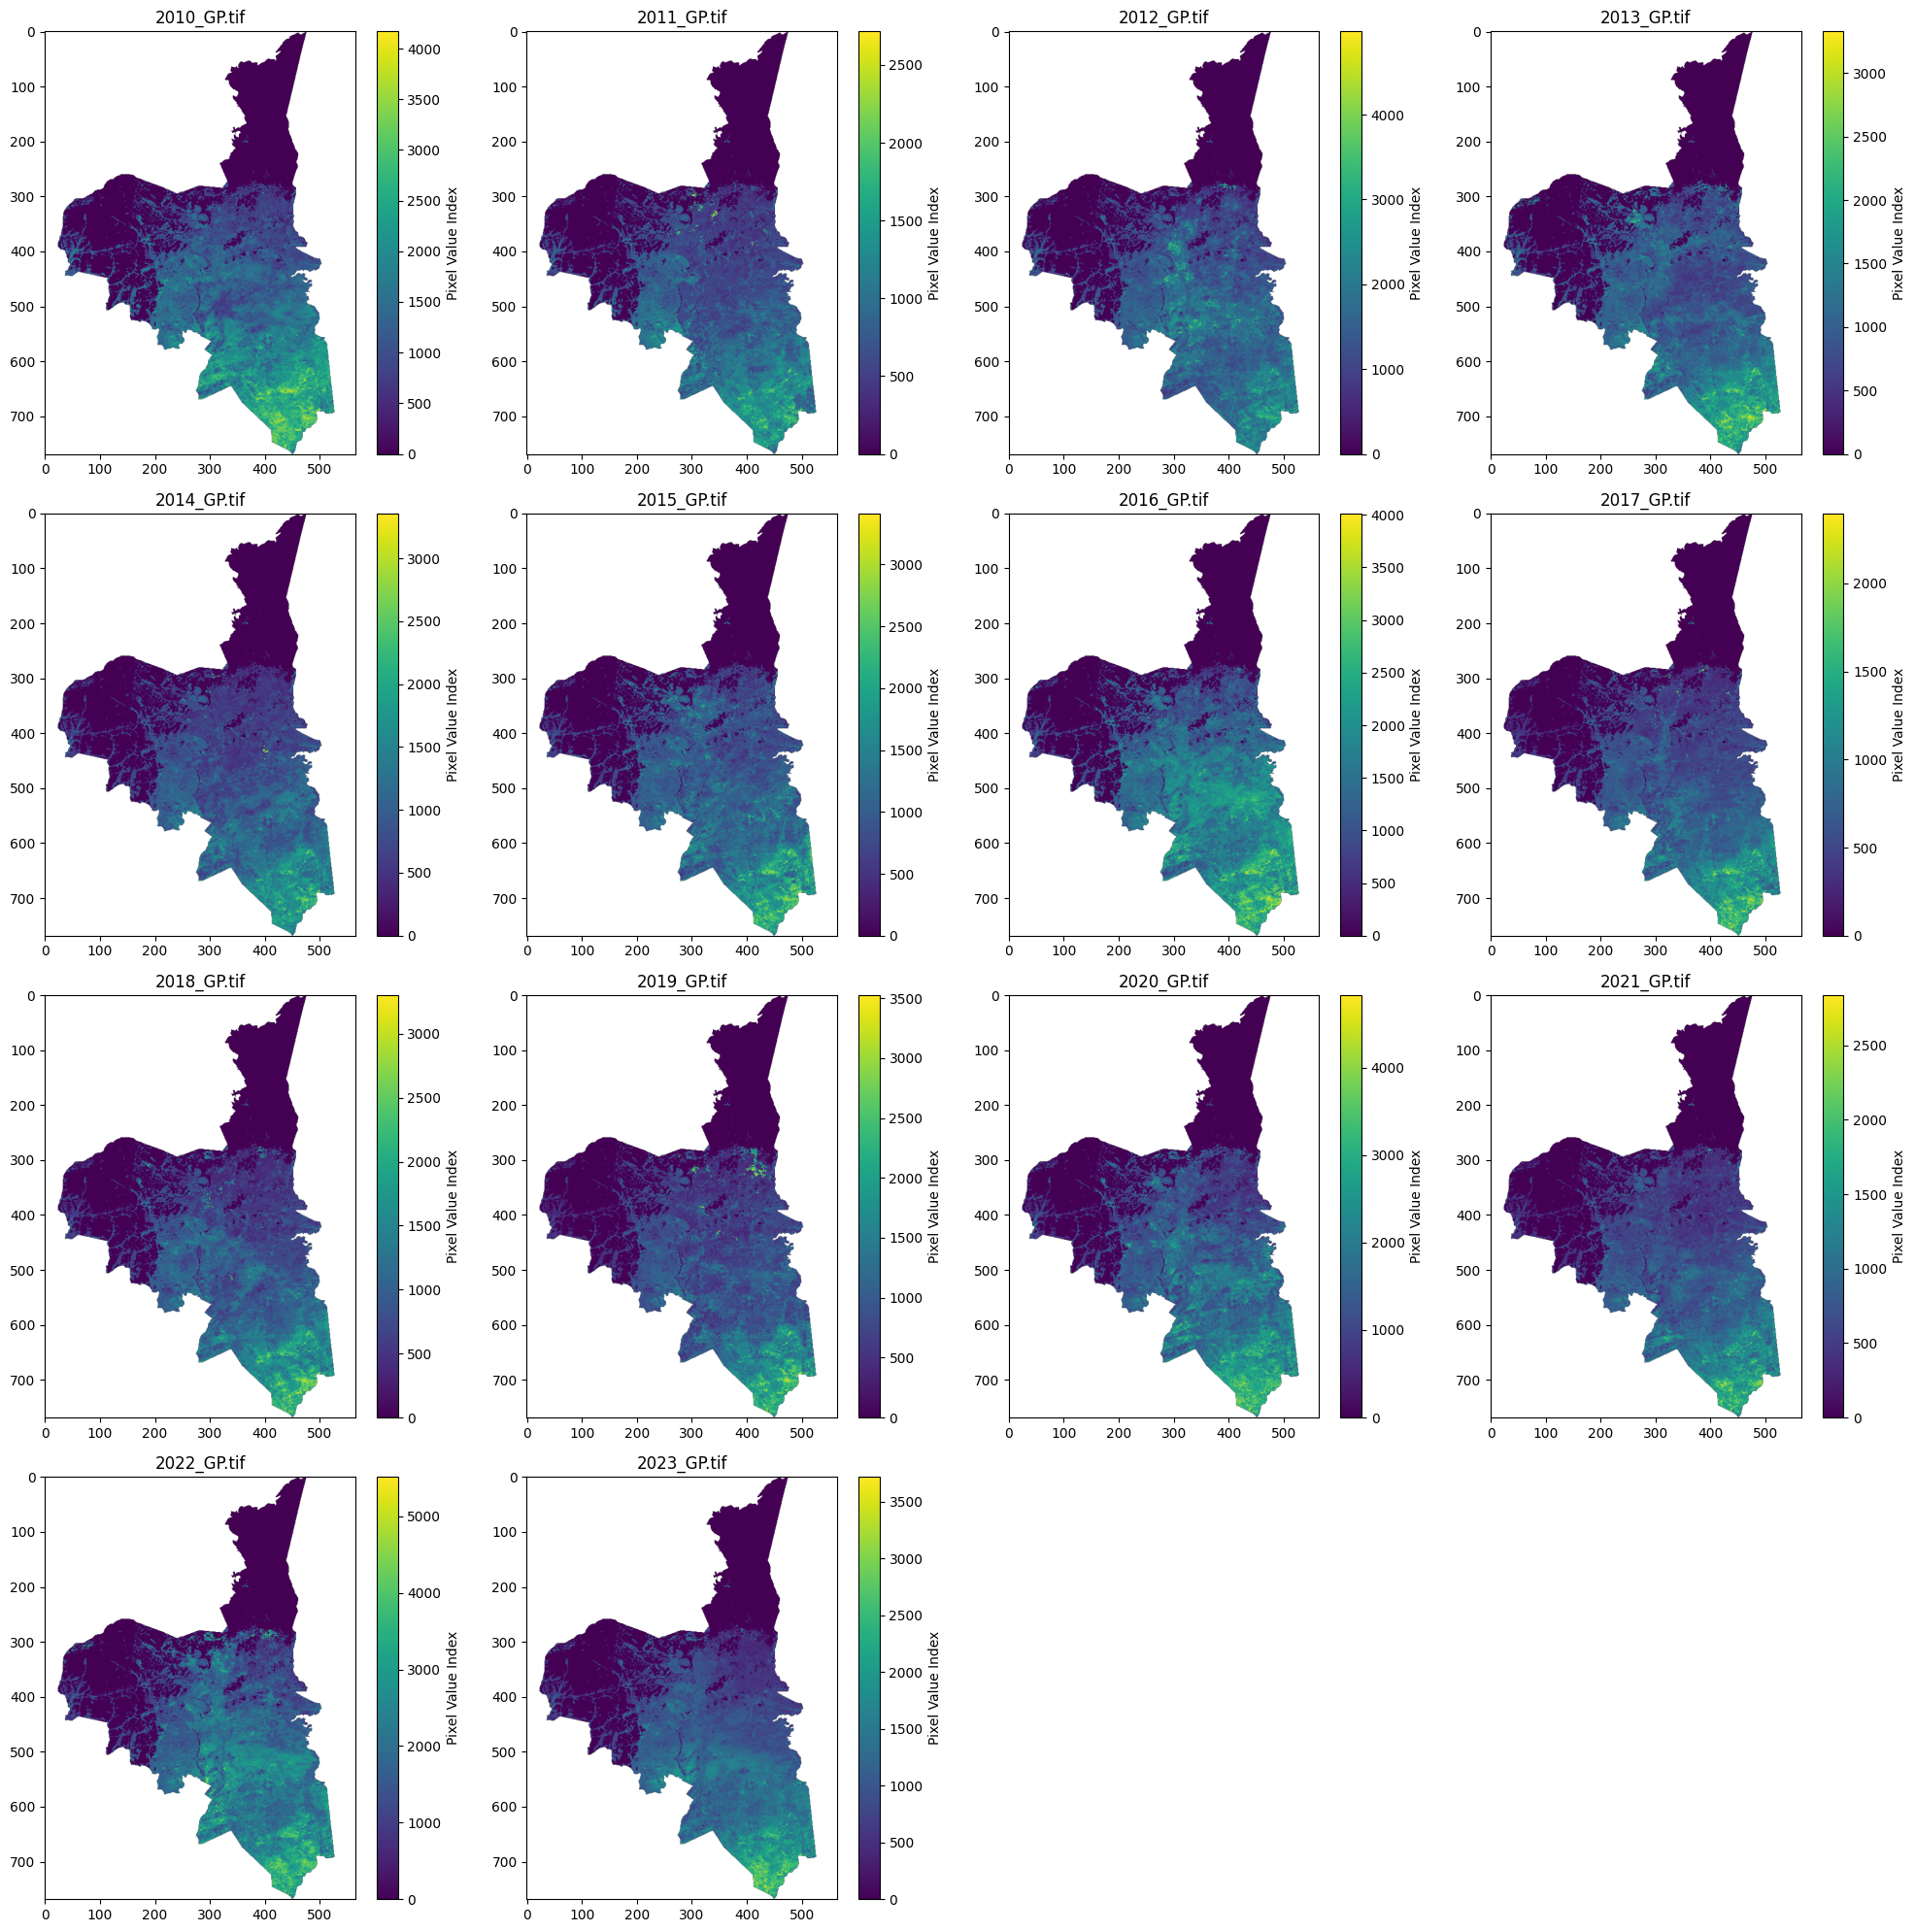

In [13]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import math

# Directory containing the TIFF files (modify as needed)
data_dir = "/content/Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP"  # Change this to your directory

# Find all TIFF files in the directory
tif_files = sorted(glob.glob(os.path.join(data_dir, "*.tif")))

# Check if files are found
if not tif_files:
    print("No TIFF files found in the specified directory.")

# Determine the number of rows and columns for the subplot grid
num_files = len(tif_files)
rows = math.ceil(math.sqrt(num_files))  # Round up to get the number of rows
cols = math.ceil(num_files / rows)  # Compute number of columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()  # Flatten in case of a 2D array

# Loop through each file and plot the data
for ax, tif_file in zip(axes, tif_files):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read first band

        # Mask out high values (assuming yellow corresponds to high values, adjust threshold if needed)
        mask_yellow = data > 65532  # Mask values that are considered yellow
        mask_border = data == 65533  # Mask the border value

        # Replace yellow values with NaN (transparent) and border values with 0 (black)
        data = np.where(mask_yellow, np.nan, data)  # Replace yellow with NaN (transparent)
        data = np.where(mask_border, 0, data)  # Set border values to 0 (black)

        # Show image
        img = ax.imshow(data, cmap='viridis')
        ax.set_title(os.path.basename(tif_file))

        # Add colorbar
        cbar = plt.colorbar(img, ax=ax, orientation='vertical')
        cbar.set_label("Pixel Value Index")



# Hide any unused subplots
for i in range(num_files, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Precipitation

Processing 2010R.tif.aux.xml...


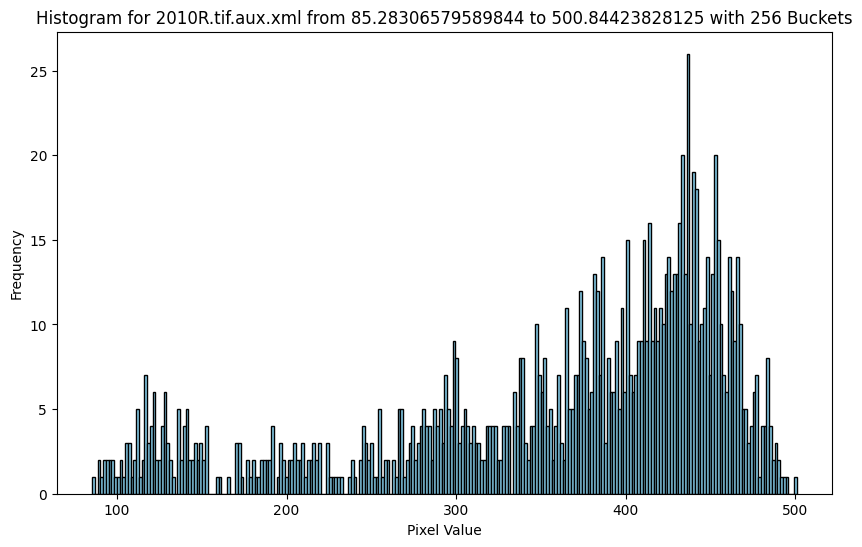

Processing 2011R.tif.aux.xml...


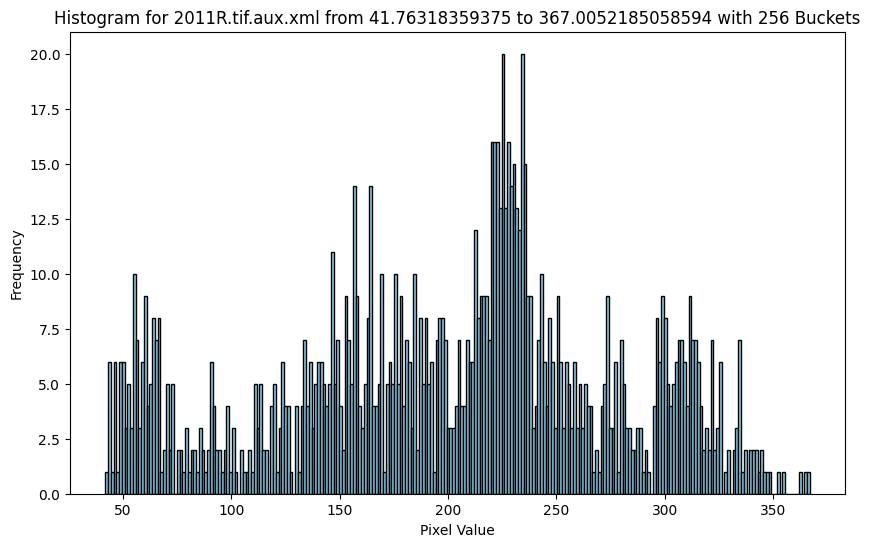

Processing 2012R.tif.aux.xml...


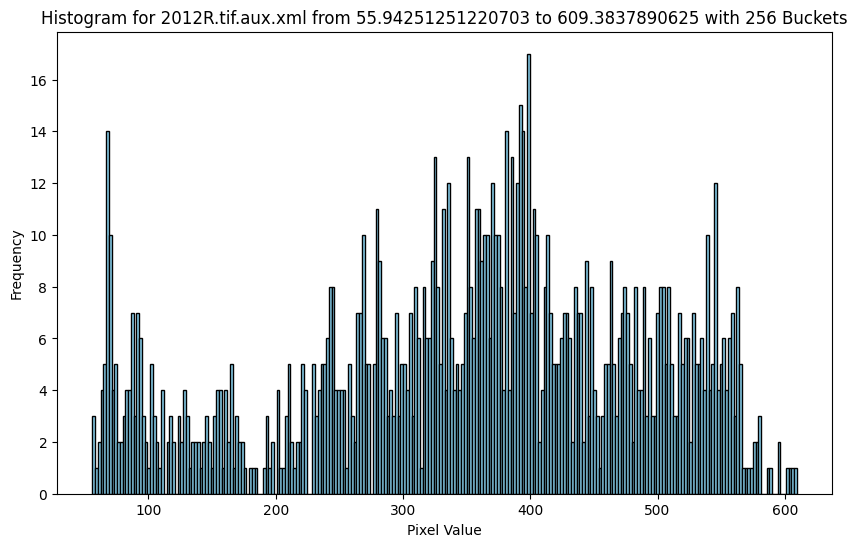

Processing 2013R.tif.aux.xml...


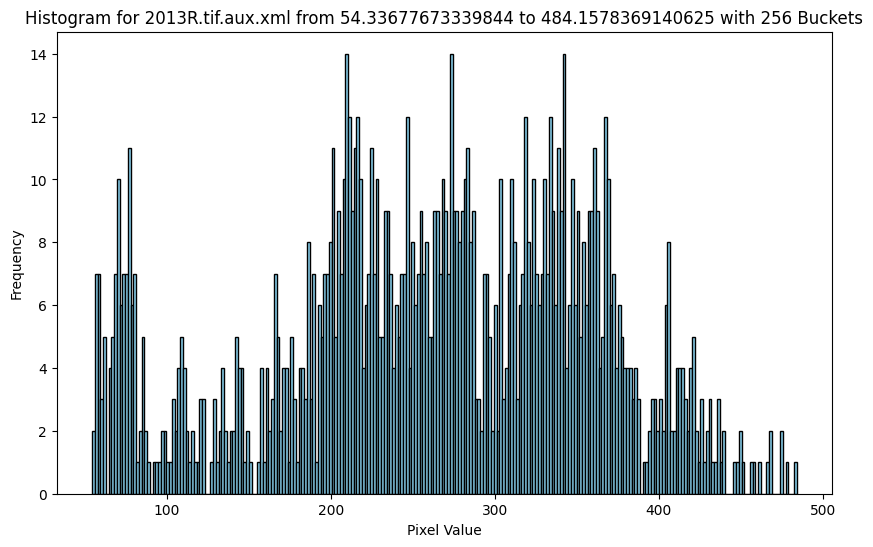

Processing 2014R.tif.aux.xml...


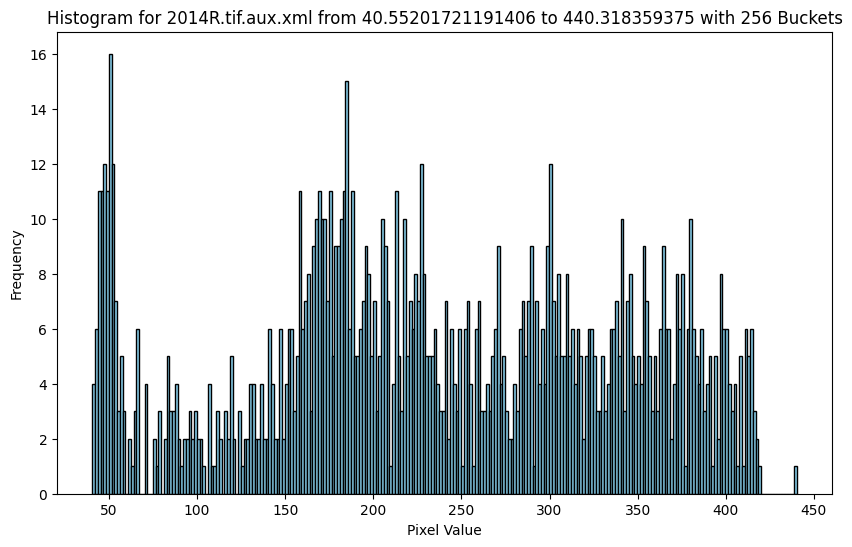

Processing 2015R.tif.aux.xml...


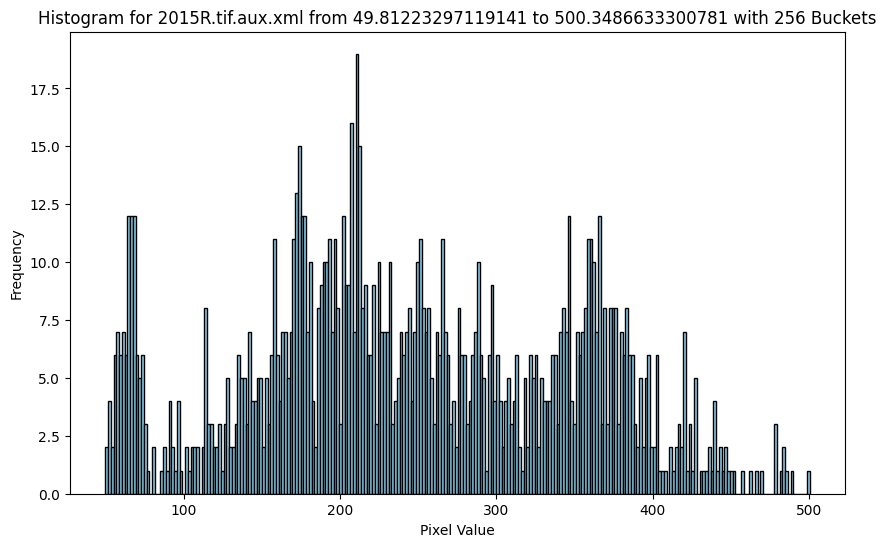

Processing 2016R.tif.aux.xml...


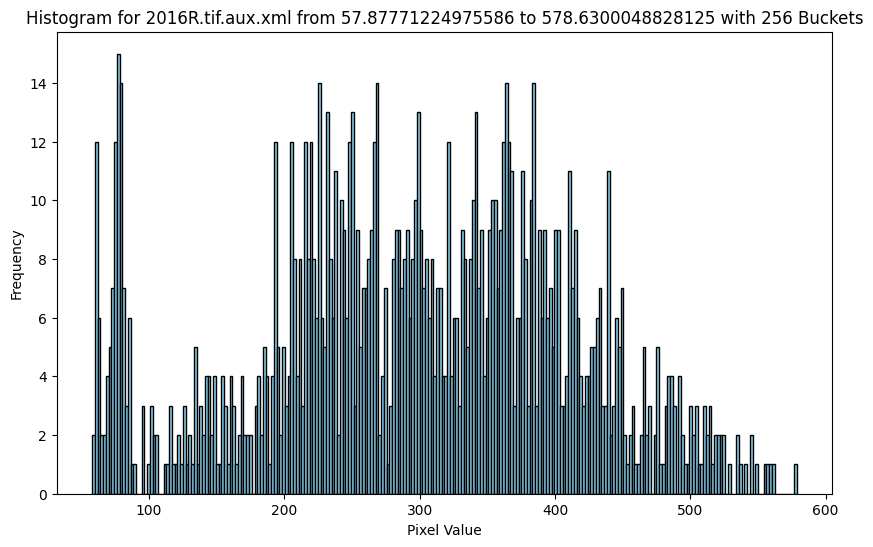

Processing 2017R.tif.aux.xml...


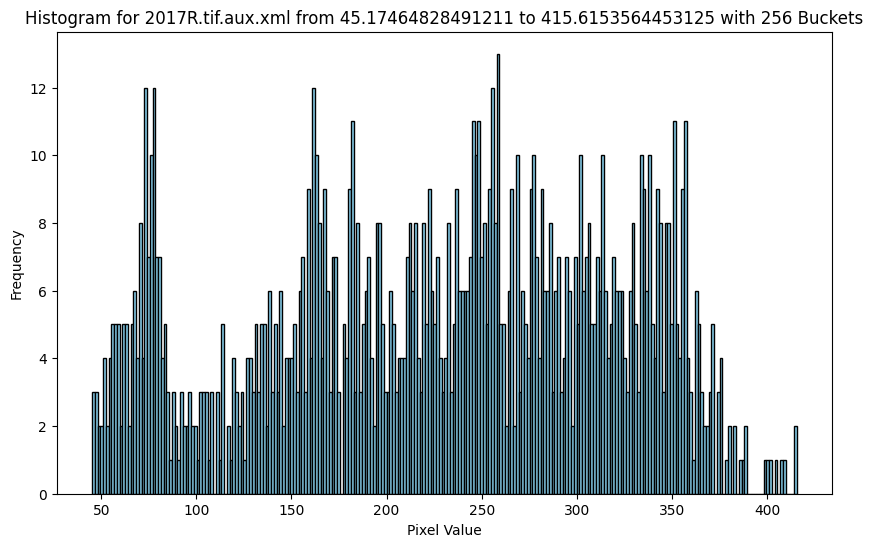

Processing 2018R.tif.aux.xml...


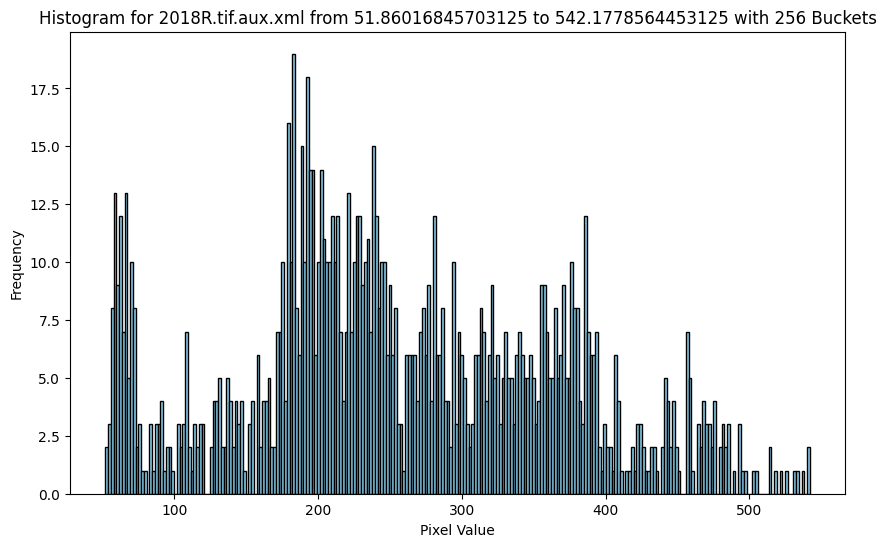

Processing 2019R.tif.aux.xml...


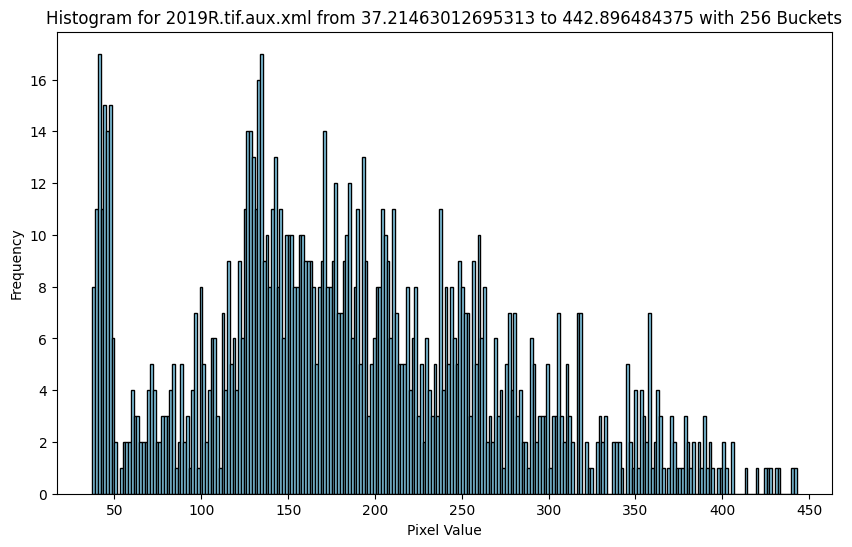

Processing 2020R.tif.aux.xml...


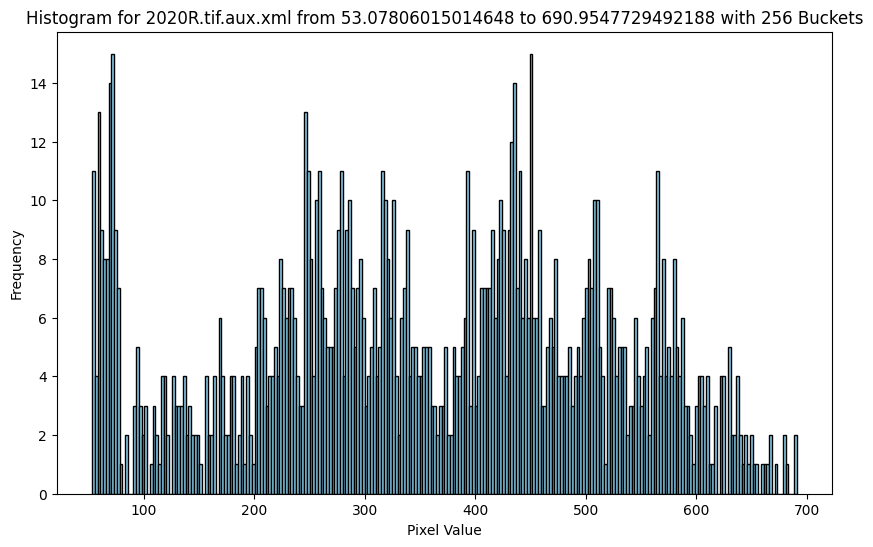

Processing 2021R.tif.aux.xml...


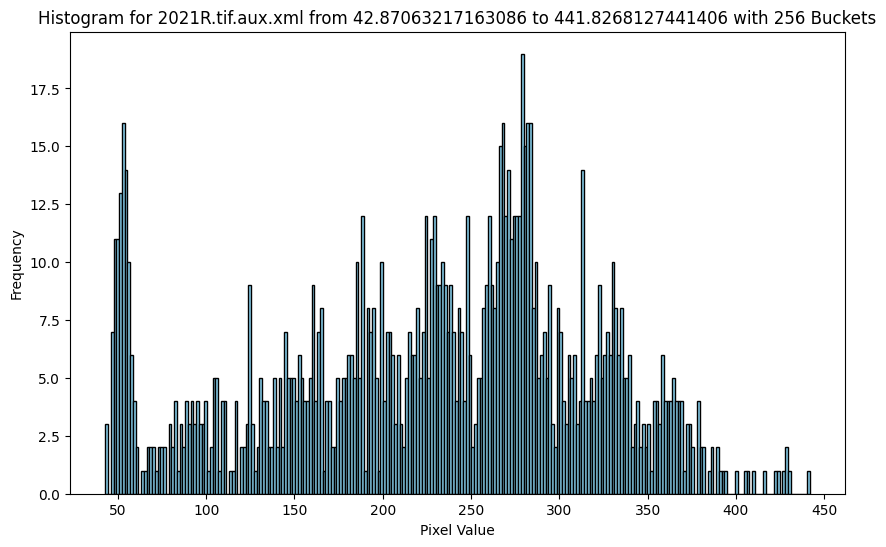

Processing 2022R.tif.aux.xml...


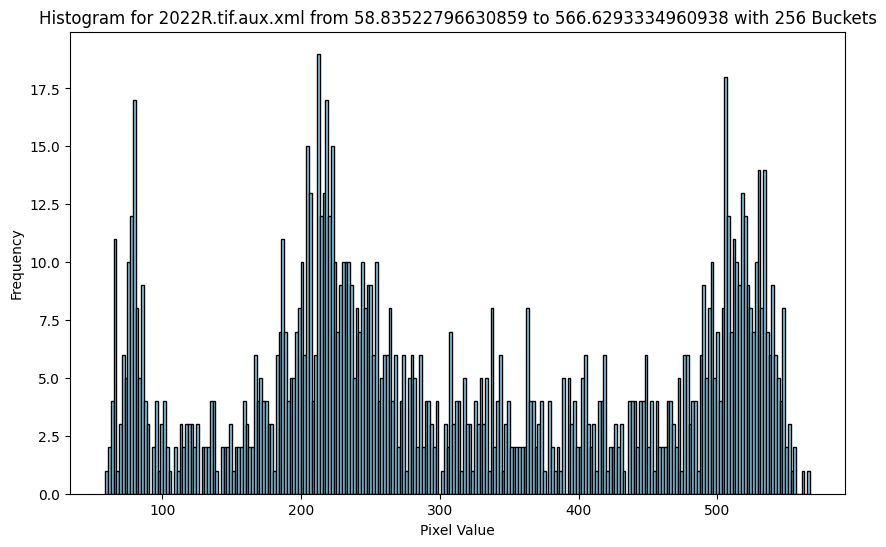

Processing 2023R.tif.aux.xml...


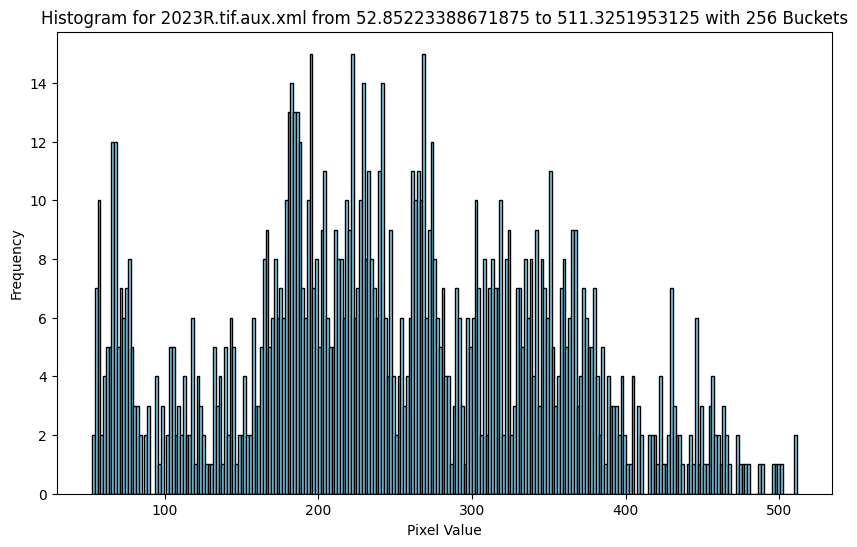

In [27]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to generate histogram from XML data
def generate_histogram(xml_file):
    # Parse the XML content
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extract Histogram Information
    hist_item = root.find(".//HistItem")
    hist_min = float(hist_item.find("HistMin").text)
    hist_max = float(hist_item.find("HistMax").text)
    bucket_count = int(hist_item.find("BucketCount").text)
    hist_counts = hist_item.find("HistCounts").text.split('|')

    # Convert the histogram counts into integers
    hist_counts = list(map(int, hist_counts))

    # Generate the bin edges based on min, max, and bucket count
    bin_edges = np.linspace(hist_min, hist_max, bucket_count + 1)

    # Create the histogram using the bin edges and counts
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(bin_edges[:-1], hist_counts, width=np.diff(bin_edges), align='edge', color='skyblue', edgecolor='black')

    # Set the axis labels and title
    ax.set_xlabel("Pixel Value")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram for {os.path.basename(xml_file)} from {hist_min} to {hist_max} with {bucket_count} Buckets")

    # Show the plot
    plt.show()

    # Print the value: frequency pairs
    # print(f"Histogram Data for {os.path.basename(xml_file)}:")
    # for idx, count in enumerate(hist_counts):
    #     print(f"Bin {idx}: {count} occurrences")

# Directory containing the XML files (modify as needed)
data_dir = "/content/Datasets_Hackathon/Climate_Precipitation_Data"  # Change this to your directory

# Find all XML files in the directory
xml_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.aux.xml')])

# Check if files are found
if not xml_files:
    print("No XML files found in the specified directory.")
else:
    # Loop through each XML file and generate a histogram
    for xml_file in xml_files:
        print(f"Processing {xml_file}...")
        generate_histogram(os.path.join(data_dir, xml_file))


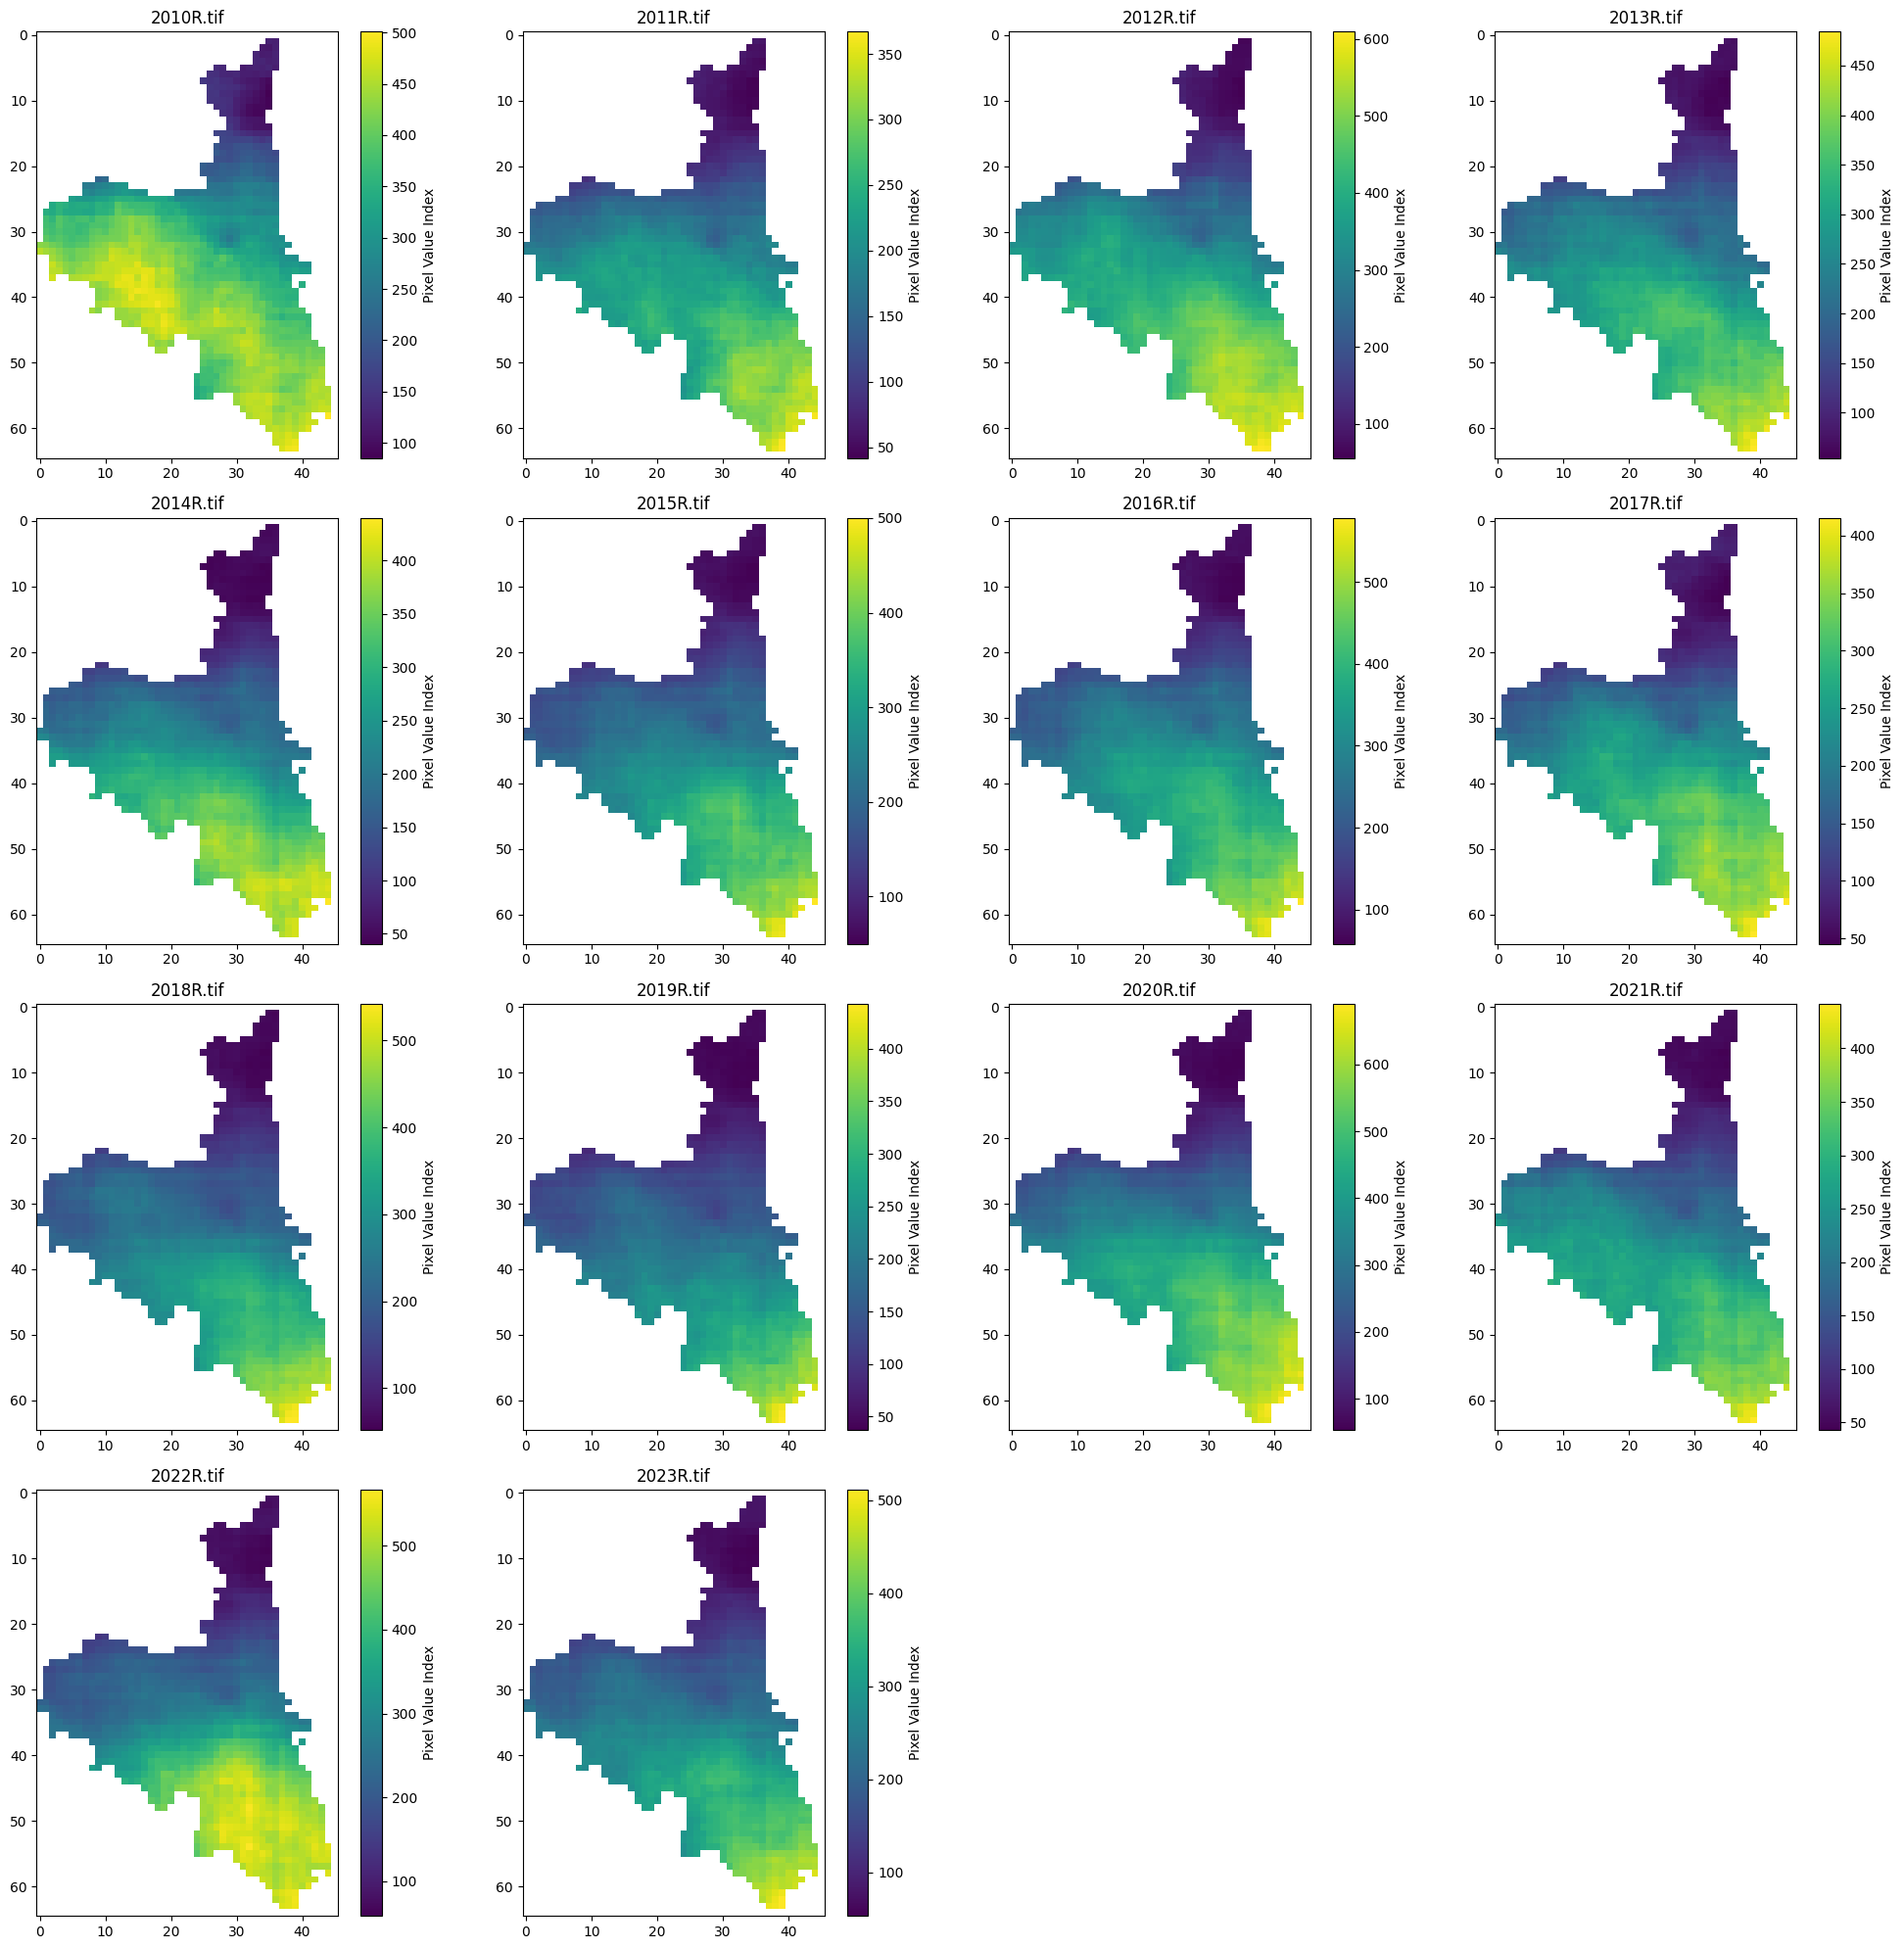

In [29]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import math

# Directory containing the TIFF files (modify as needed)
data_dir = "/content/Datasets_Hackathon/Climate_Precipitation_Data"  # Change this to your directory

# Find all TIFF files in the directory
tif_files = sorted(glob.glob(os.path.join(data_dir, "*.tif")))

# Check if files are found
if not tif_files:
    print("No TIFF files found in the specified directory.")

# Determine the number of rows and columns for the subplot grid
num_files = len(tif_files)
rows = math.ceil(math.sqrt(num_files))  # Round up to get the number of rows
cols = math.ceil(num_files / rows)  # Compute number of columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()  # Flatten in case of a 2D array

# Loop through each file and plot the data
for ax, tif_file in zip(axes, tif_files):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read first band

        # Mask out out of boundary (assuming values are -3.4028235e+38 for out of bounds)
        mask_out_of_bound = data == -3.4028235e+38

        # You can add any other specific condition for 'yellow' or high values if needed
        # Here we use a threshold as an example for high values (change as necessary)
        mask_yellow = data > 65532  # Example threshold for yellow (modify as needed)

        # Mask out out-of-bound and yellow values
        data = np.where(mask_out_of_bound, np.nan, data)  # Replace out of boundary values with NaN
        data = np.where(mask_yellow, np.nan, data)  # Replace yellow values with NaN (transparent)

        # Optionally, mask border values (set to 0 as black) - if you have a specific condition for borders
        mask_border = data == 0  # Example condition for border (change as needed)
        data = np.where(mask_border, 0, data)  # Set border values to 0 (black)

        # Show image
        img = ax.imshow(data, cmap='viridis')
        ax.set_title(os.path.basename(tif_file))

        # Add colorbar
        cbar = plt.colorbar(img, ax=ax, orientation='vertical')
        cbar.set_label("Pixel Value Index")

# Hide any unused subplots
for i in range(num_files, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


pop density

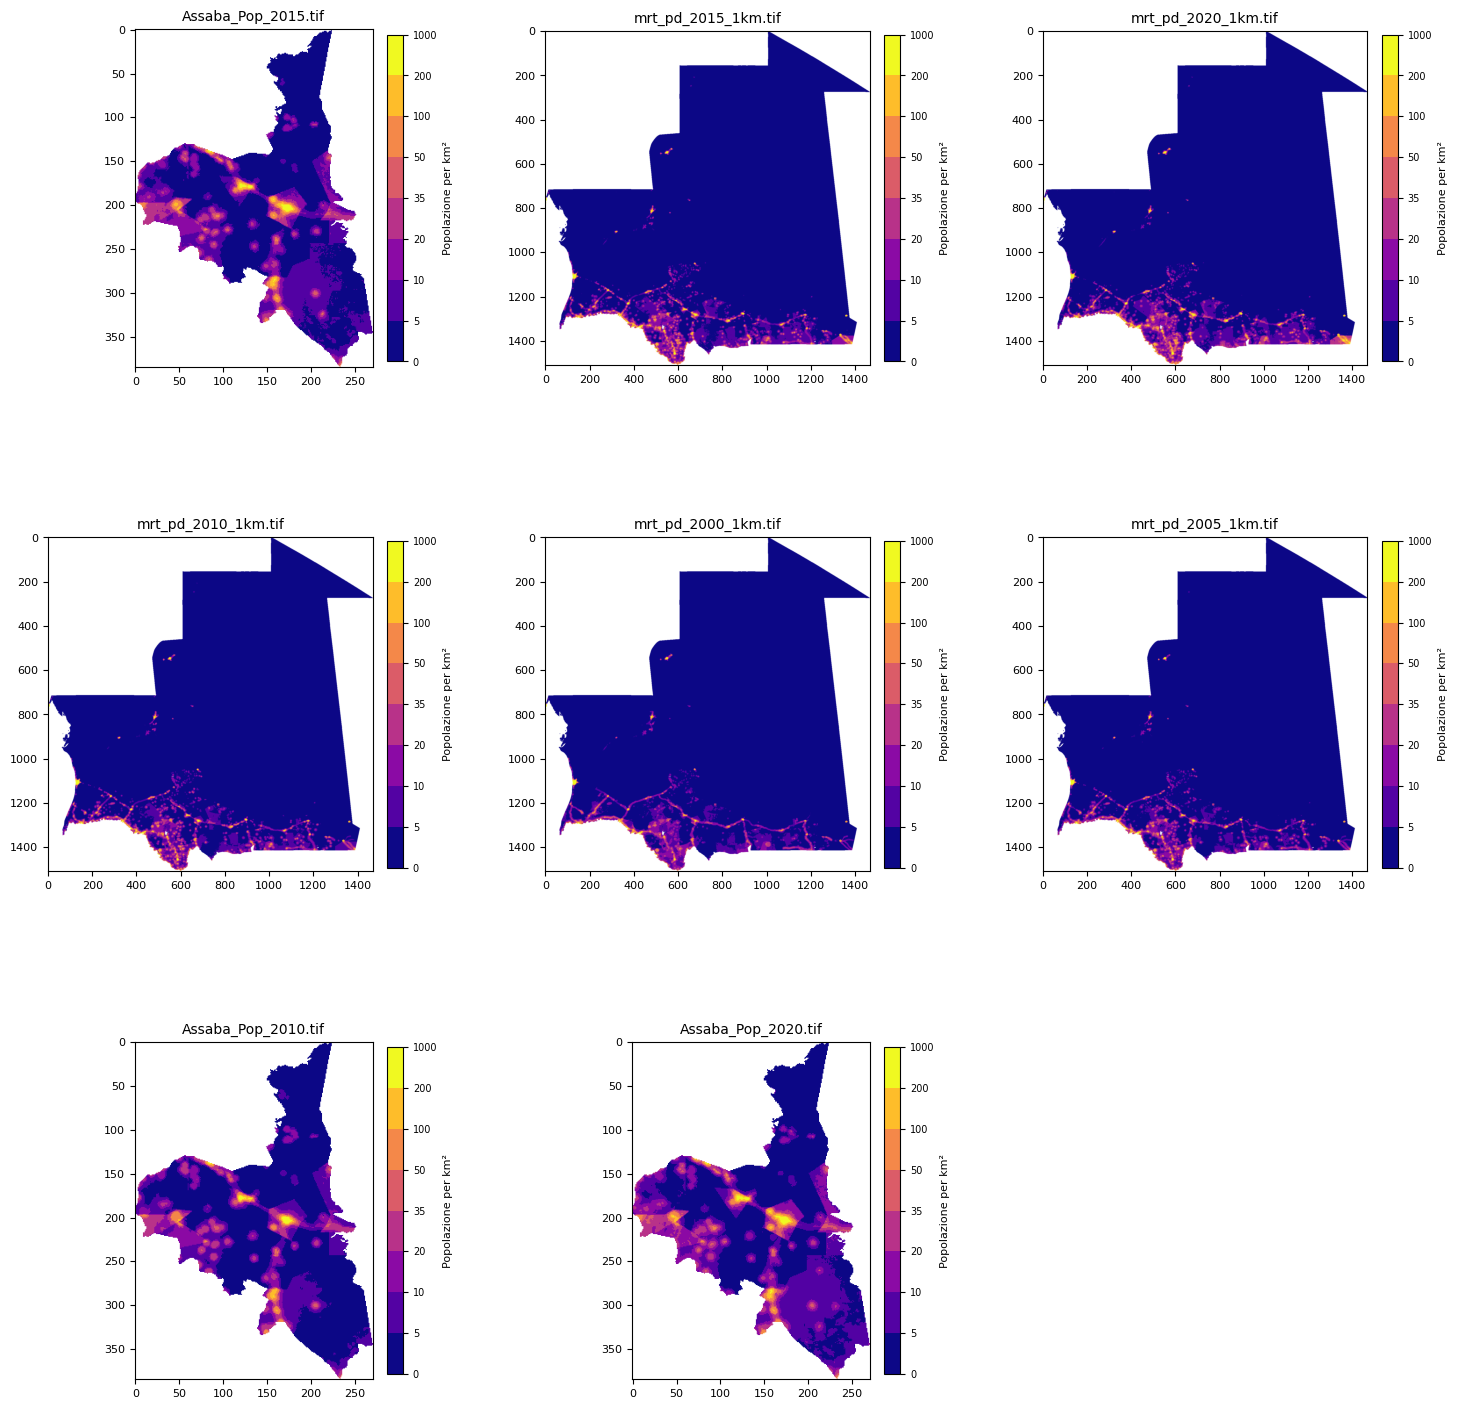

In [32]:
import os
import glob
import math
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

def display_all_tifs(folder, boundaries):
    # Trova tutti i file TIFF nella cartella specificata
    tif_files = glob.glob(os.path.join(folder, '*.tif'))
    if not tif_files:
        print("Nessun file .tif trovato nella cartella:", folder)
        return

    # Calcola il layout della griglia
    n_files = len(tif_files)
    n_cols = math.ceil(math.sqrt(n_files))
    n_rows = math.ceil(n_files / n_cols)

    # Crea una colormap discreta con una gamma di colori più ampia
    cmap = plt.get_cmap('plasma', len(boundaries) - 1)
    norm = BoundaryNorm(boundaries, cmap.N)

    # Crea la figura con dimensioni adeguate
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    if n_files == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Visualizza ogni file TIFF con colorbar discreta
    for ax, tif_file in zip(axes, tif_files):
        with rasterio.open(tif_file) as src:
            img = src.read(1)
            img = np.where(img == src.nodata, np.nan, img)
            cmap = plt.get_cmap('plasma', len(boundaries) - 1)
            cmap.set_bad(color='white')  # Imposta il colore per i valori no data
            norm = BoundaryNorm(boundaries, cmap.N)
            image = ax.imshow(img, cmap=cmap, norm=norm)
            ax.set_title(os.path.basename(tif_file), fontsize=10)
            ax.tick_params(axis='both', which='major', labelsize=8)

            # Aggiungi colorbar discreta
            cbar = fig.colorbar(image, ax=ax, fraction=0.046, pad=0.04, ticks=boundaries)
            cbar.set_label('Popolazione per km²', fontsize=8)
            cbar.ax.tick_params(labelsize=7)

    # Rimuovi i subplot in eccesso
    for ax in axes[len(tif_files):]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.5, wspace=0.4)
    plt.show()

if __name__ == '__main__':
    folder_path = '/content/Datasets_Hackathon/Gridded_Population_Density_Data'
    boundaries = [0, 5, 10, 20, 35, 50, 100, 200, 1000]
    display_all_tifs(folder_path, boundaries)

# streamroad

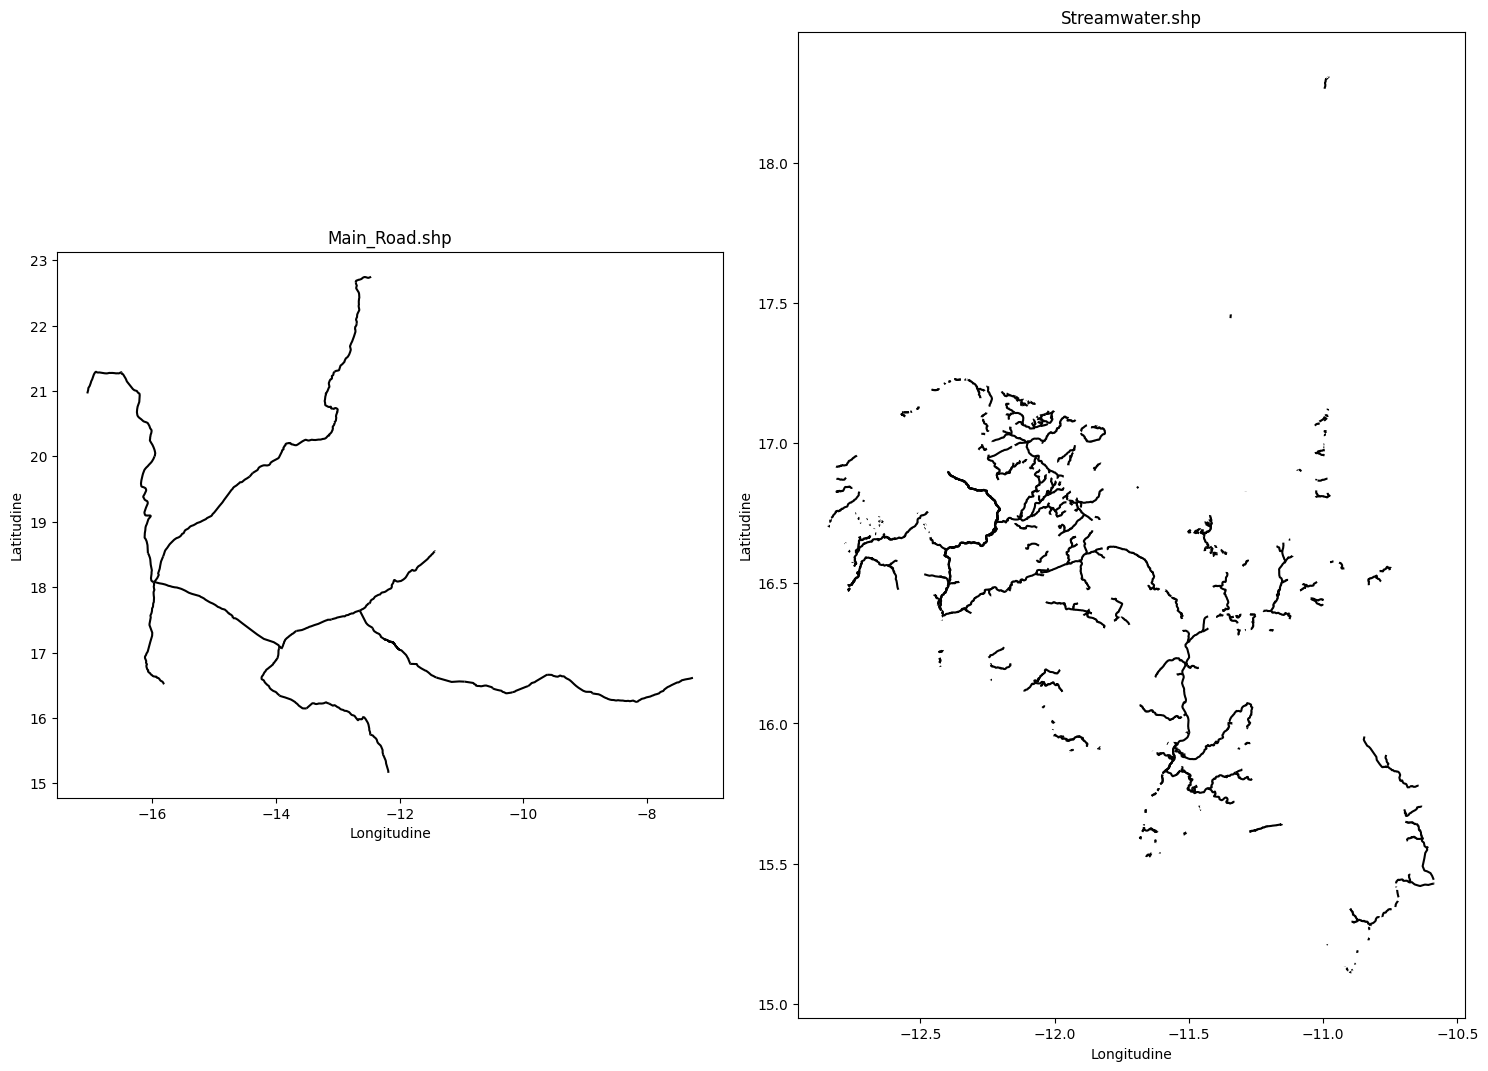

In [34]:
#!/usr/bin/env python3
import os
import glob
import math
import argparse
import geopandas as gpd
import matplotlib.pyplot as plt

def main():
    # Imposta gli argomenti della riga di comando:
    # - directory: cartella contenente i file .shp
    mypath = "/content/Datasets_Hackathon/Streamwater_Line_Road_Network"

    # Ricerca tutti i file .shp nella directory specificata
    shapefiles = glob.glob(os.path.join(mypath, "*.shp"))
    if not shapefiles:
        print("Nessun file .shp trovato nella directory specificata.")
        return

    # Determina la dimensione della griglia per i grafici in base al numero di shapefile trovati
    n = len(shapefiles)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    # Crea la figura e gli assi
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    # Assicuriamoci di avere una lista di assi anche se c'è un solo grafico
    if n == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Itera su ogni file shapefile e crea il grafico corrispondente
    for i, shp_file in enumerate(shapefiles):
        try:
            gdf = gpd.read_file(shp_file)
        except Exception as e:
            print(f"Errore nella lettura del file {shp_file}: {e}")
            continue
        ax = axes[i]
        gdf.plot(ax=ax, edgecolor='black')
        ax.set_title(os.path.basename(shp_file))
        ax.set_xlabel("Longitudine")
        ax.set_ylabel("Latitudine")

    # Se ci sono più assi di quanti file siano stati trovati, rimuove quelli inutilizzati
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# Administration

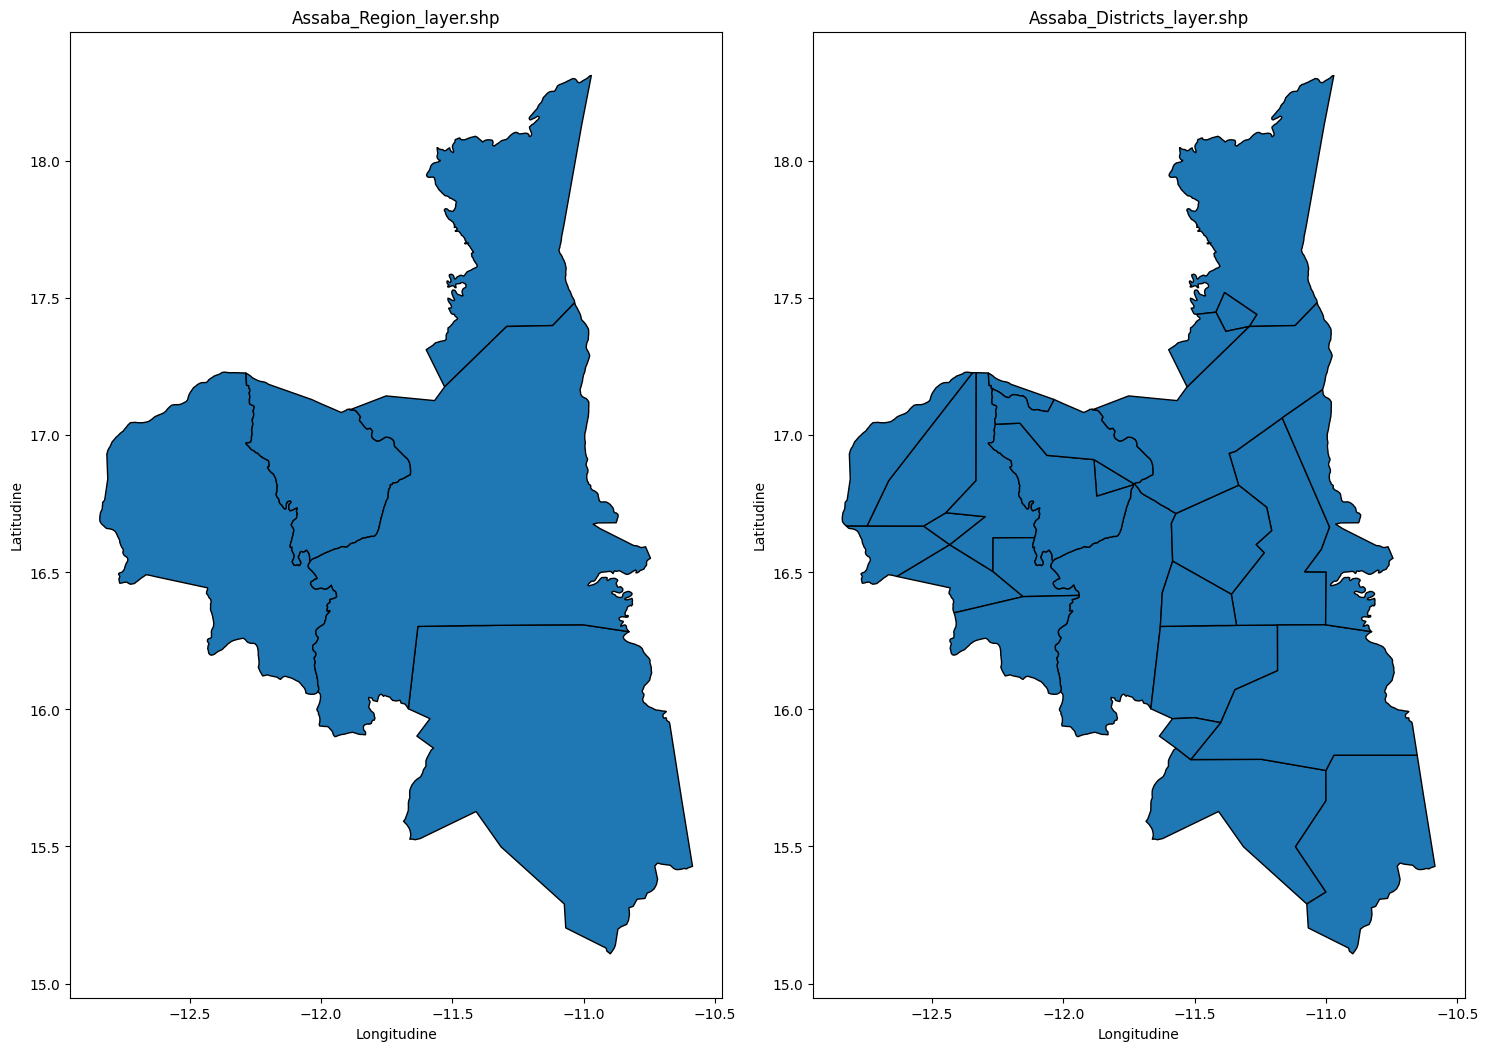

In [35]:
#!/usr/bin/env python3
import os
import glob
import math
import argparse
import geopandas as gpd
import matplotlib.pyplot as plt

def main():
    # Imposta gli argomenti della riga di comando:
    # - directory: cartella contenente i file .shp
    mypath = "/content/Datasets_Hackathon/Admin_layers"

    # Ricerca tutti i file .shp nella directory specificata
    shapefiles = glob.glob(os.path.join(mypath, "*.shp"))
    if not shapefiles:
        print("Nessun file .shp trovato nella directory specificata.")
        return

    # Determina la dimensione della griglia per i grafici in base al numero di shapefile trovati
    n = len(shapefiles)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    # Crea la figura e gli assi
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    # Assicuriamoci di avere una lista di assi anche se c'è un solo grafico
    if n == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Itera su ogni file shapefile e crea il grafico corrispondente
    for i, shp_file in enumerate(shapefiles):
        try:
            gdf = gpd.read_file(shp_file)
        except Exception as e:
            print(f"Errore nella lettura del file {shp_file}: {e}")
            continue
        ax = axes[i]
        gdf.plot(ax=ax, edgecolor='black')
        ax.set_title(os.path.basename(shp_file))
        ax.set_xlabel("Longitudine")
        ax.set_ylabel("Latitudine")

    # Se ci sono più assi di quanti file siano stati trovati, rimuove quelli inutilizzati
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
